In [ ]:
#importing libraries 
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from google.colab import files

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#assigning paths of dataset and class
train_path = '/content/drive/MyDrive/pest/train'
valid_path = '/content/drive/MyDrive/pest/test'
classes=os.listdir('/content/drive/MyDrive/pest/test')
classes=sorted(classes)
classes

['aphids',
 'armyworm',
 'beetle',
 'bollworm',
 'grasshopper',
 'mites',
 'mosquito',
 'sawfly',
 'stem_borer']

In [ ]:
#importing tranfer learining model
inception = InceptionV3(input_shape=[224,224,3], weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
#output layer of model
x = Flatten()(inception.output)
prediction = Dense(len(classes), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
#processing of dataset
train_datagen = ImageDataGenerator(rescale = 1./255.,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,target_size = (224, 224),batch_size = 16,class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path ,target_size = (224, 224),batch_size = 16,class_mode = 'categorical')

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [ ]:
#compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#training model
hist=model.fit( training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/5
169/169 [==============================] - 420s 2s/step - loss: 2.8258 - accuracy: 0.7570 - val_loss: 0.9743 - val_accuracy: 0.8889
Epoch 2/5
169/169 [==============================] - 44s 260ms/step - loss: 0.7662 - accuracy: 0.9104 - val_loss: 0.9794 - val_accuracy: 0.9133
Epoch 3/5
169/169 [==============================] - 43s 256ms/step - loss: 0.5844 - accuracy: 0.9352 - val_loss: 1.5279 - val_accuracy: 0.9222
Epoch 4/5
169/169 [==============================] - 43s 256ms/step - loss: 0.3680 - accuracy: 0.9637 - val_loss: 1.0885 - val_accuracy: 0.9422
Epoch 5/5
169/169 [==============================] - 43s 256ms/step - loss: 0.3962 - accuracy: 0.9604 - val_loss: 1.0213 - val_accuracy: 0.9622


In [ ]:
#evaluating model
loss, acc = model.evaluate(test_set)

print(f'Testing Accuracy: {acc*100}')
print(f'Testing Loss: {loss}')

29/29 [==============================] - 2s 78ms/step - loss: 1.0213 - accuracy: 0.9622
Testing Accuracy: 96.22222185134888
Testing Loss: 1.0212507247924805


Saving ap.jpg to ap.jpg


Text(0.5, 1.0, 'aphids')

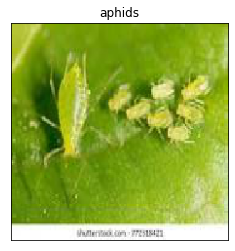

In [ ]:
uploaded =files.upload()
for fn in uploaded.keys():
  uploadedimagepath=f'/content/{fn}'

import cv2 as cv
img = image.load_img(uploadedimagepath, target_size = (224,224))
gray_image = cv.imread(uploadedimagepath)
gray_image = gray_image / 255
gray_image = cv.resize(gray_image, (224, 224))
gray_image = gray_image.reshape(-1, 224, 224, 3)

prediction=model.predict(gray_image)
prediction
a=prediction.reshape(-1)
list1 = a.tolist()
list1.index(max(list1))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.title(classes[list1.index(max(list1))])

Saving army.jpg to army.jpg


Text(0.5, 1.0, 'armyworm')

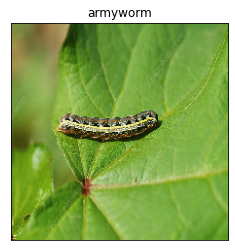

In [ ]:
uploaded =files.upload()
for fn in uploaded.keys():
  uploadedimagepath=f'/content/{fn}'

import cv2 as cv
img = image.load_img(uploadedimagepath, target_size = (224,224))
gray_image = cv.imread(uploadedimagepath)
gray_image = gray_image / 255
gray_image = cv.resize(gray_image, (224, 224))
gray_image = gray_image.reshape(-1, 224, 224, 3)

prediction=model.predict(gray_image)
prediction
a=prediction.reshape(-1)
list1 = a.tolist()
list1.index(max(list1))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.title(classes[list1.index(max(list1))])

Saving bollworm.jpg to bollworm.jpg


Text(0.5, 1.0, 'bollworm')

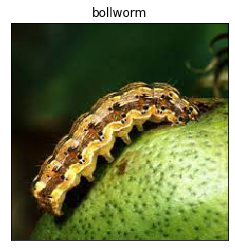

In [ ]:
uploaded =files.upload()
for fn in uploaded.keys():
  uploadedimagepath=f'/content/{fn}'

import cv2 as cv
img = image.load_img(uploadedimagepath, target_size = (224,224))
gray_image = cv.imread(uploadedimagepath)
gray_image = gray_image / 255
gray_image = cv.resize(gray_image, (224, 224))
gray_image = gray_image.reshape(-1, 224, 224, 3)

prediction=model.predict(gray_image)
prediction
a=prediction.reshape(-1)
list1 = a.tolist()
list1.index(max(list1))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.title(classes[list1.index(max(list1))])

In [ ]:
model.save('/content/drive/MyDrive/Model','model_pest.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Model/assets


Saving Mite.jpg to Mite.jpg


Text(0.5, 1.0, 'mites')

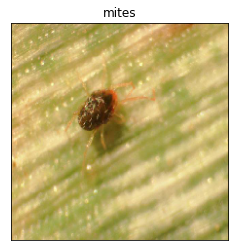

In [ ]:
uploaded =files.upload()
for fn in uploaded.keys():
  uploadedimagepath=f'/content/{fn}'

import cv2 as cv
img = image.load_img(uploadedimagepath, target_size = (224,224))
gray_image = cv.imread(uploadedimagepath)
gray_image = gray_image / 255
gray_image = cv.resize(gray_image, (224, 224))
gray_image = gray_image.reshape(-1, 224, 224, 3)

prediction=model.predict(gray_image)
prediction
a=prediction.reshape(-1)
list1 = a.tolist()
list1.index(max(list1))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.title(classes[list1.index(max(list1))])

Saving mitoo.jpg to mitoo.jpg


Text(0.5, 1.0, 'mites')

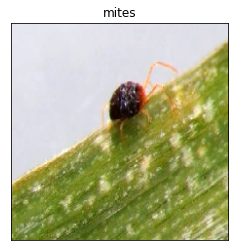

In [ ]:
uploaded =files.upload()
for fn in uploaded.keys():
  uploadedimagepath=f'/content/{fn}'

import cv2 as cv
img = image.load_img(uploadedimagepath, target_size = (224,224))
gray_image = cv.imread(uploadedimagepath)
gray_image = gray_image / 255
gray_image = cv.resize(gray_image, (224, 224))
gray_image = gray_image.reshape(-1, 224, 224, 3)

prediction=model.predict(gray_image)
prediction
a=prediction.reshape(-1)
list1 = a.tolist()
list1.index(max(list1))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.title(classes[list1.index(max(list1))])

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries 
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from google.colab import files

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

new_model = keras.models.load_model('/content/drive/MyDrive/Model')


In [3]:
#assigning paths of dataset and class
train_path = '/content/drive/MyDrive/pest/train'
valid_path = '/content/drive/MyDrive/pest/test'
classes=os.listdir('/content/drive/MyDrive/pest/test')
classes=sorted(classes)
classes

#processing of dataset
train_datagen = ImageDataGenerator(rescale = 1./255.,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

training_set = train_datagen.flow_from_directory(train_path,target_size = (224, 224),batch_size = 16,class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(valid_path ,target_size = (224, 224),batch_size = 16,class_mode = 'categorical')


Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.


In [4]:

#evaluating model
loss, acc = new_model.evaluate(test_set)

print(f'Testing Accuracy: {acc*100}')
print(f'Testing Loss: {loss}')

29/29 [==============================] - 247s 8s/step - loss: 1.0213 - accuracy: 0.9622
Testing Accuracy: 96.22222185134888
Testing Loss: 1.0212801694869995


Saving Pea_ahid.webp to Pea_ahid.webp


Text(0.5, 1.0, 'aphids')

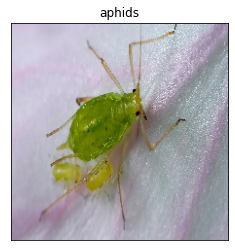

In [ ]:
uploaded =files.upload()
for fn in uploaded.keys():
  uploadedimagepath=f'/content/{fn}'

import cv2 as cv
img = image.load_img(uploadedimagepath, target_size = (224,224))
gray_image = cv.imread(uploadedimagepath)
gray_image = gray_image / 255
gray_image = cv.resize(gray_image, (224, 224))
gray_image = gray_image.reshape(-1, 224, 224, 3)

prediction=new_model.predict(gray_image)
prediction
a=prediction.reshape(-1)
list1 = a.tolist()
list1.index(max(list1))
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.title(classes[list1.index(max(list1))])